In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/DM"
os.chdir(path)
os.listdir(path)

['DM.ipynb', 'Telecon.csv', 'settingFunction.ipynb']

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/DM")

In [ ]:
!python settingFunction.ipynb

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

auc_val_value, recall_val_value, prec_val_value, f1_val_value, cm_val_value = [], [], [], [], []


def DataImport(data):
    X = data.drop('Churn', axis=1)  # 刪除target列之欄位
    y = data['Churn']
    variables = X.values
    type_label = (data['Churn']).values
    X_training, X_testing, y_training, y_testing = train_test_split(variables, type_label, test_size=0.2, random_state=1)  # 80% training and 20% test
    return X, y, X_training, X_testing, y_training, y_testing


def ScoreChart(mode, accuracy, recall, precision, f1):
    mode = str(mode)
    t_scores = [accuracy, recall, precision, f1]
    t_scores_name = ['accuracy', 'recall', 'precision', 'f1']
    t_scores_chart = pd.DataFrame(t_scores, t_scores_name)
    if 'y' in mode:
        print(t_scores_chart)


def ScoreReport(y_t, predictions_t):
    accuracy = sklearn.metrics.accuracy_score(y_t, predictions_t)
    recall = sklearn.metrics.recall_score(y_t, predictions_t)
    precision = sklearn.metrics.precision_score(y_t, predictions_t)
    f1 = sklearn.metrics.f1_score(y_t, predictions_t)
    cm = confusion_matrix(y_t, predictions_t)
    print(cm)
    t_scores = [accuracy, recall, precision, f1]
    return t_scores


def ScoreList(mode, y_t, predictions_t):
    mode = str(mode)
    accuracy, recall, precision, f1, cm = ScoreReport(mode, y_t, predictions_t)
    auc_val_value.append(accuracy)
    recall_val_value.append(recall)
    prec_val_value.append(precision)
    f1_val_value.append(f1)
    cm_val_value.append(cm)
    return auc_val_value, recall_val_value, prec_val_value, f1_val_value, cm_val_value


def roc(title, y_t, predictions_t):
    fpr, tpr, thresholds = roc_curve(y_t, predictions_t)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (title, roc_auc))
    #plt.plot([0, 1], [0, 1], color='green', linestyle='--')

def rocshow(title):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


def lowerSample(df,percent=1):
    data_more = df[df['Churn']==0]  #類別多
    data_less = df[df['Churn']==1]  #類別少
    np.random.seed(61)
    index = np.random.randint(len(data_more),size = percent*(len(df)-len(data_more)))
    lower_data_more = data_more.iloc[list(index)]   #下採樣
    undersampling_data = pd.concat([lower_data_more, data_less])
    return (undersampling_data)

def lowerSamples(df,percent=1):
    data_more = df[df['Churn']==1]  #類別多
    data_less = df[df['Churn']==0]  #類別少
    np.random.seed(61)
    index = np.random.randint(len(data_more),size = percent*(len(df)-len(data_more)))
    lower_data_more = data_more.iloc[list(index)]   #下採樣
    undersampling_data = pd.concat([lower_data_more, data_less])
    return (undersampling_data)

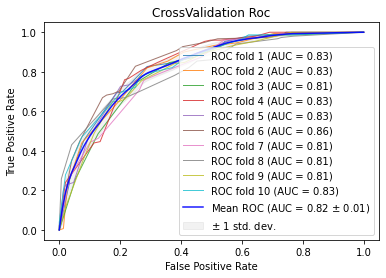

=========================Data切割狀況=========================
--TRAINING SET--
(2990, 19)
-train-
(2691, 19)
-validation-
(299, 19)
--TESTING SET--
(748, 19)
=========================參數最佳化=========================
                0
最佳組別:   31.000000
最佳準確率:   0.769231
最佳深度:    4.000000
=========================預測結果=========================
* 平均最佳： NO. 31  (第 4 組, fold 1 ) *

-Validation-
[[106  43]
 [ 26 124]]

-TEST-
[[267 117]
 [ 64 300]]
       Score  Val(mean)  Val(best)      Test
0   accuracy   0.748161   0.769231  0.758021
1     recall   0.774102   0.826667  0.824176
2  precision   0.740269   0.742515  0.719424
3         f1   0.755650   0.782334  0.768246


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


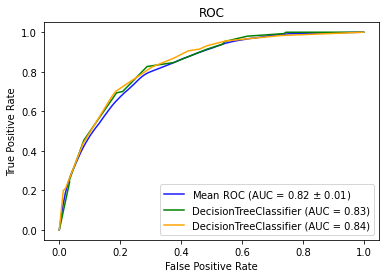

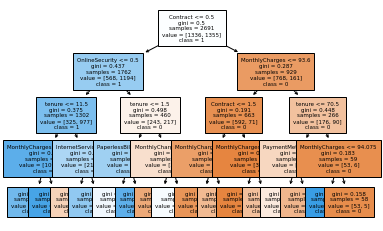

In [ ]:
# undersampling
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import statistics
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn import tree


# 導入特徵數據
data_original = pd.read_csv("Telecon.csv")
data = lowerSample(data_original)
Depth_value_range = range(1, 11)
X, y, X_training, X_testing, y_training, y_testing = DataImport(data)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # 定義10折交叉驗證:分層KFold 90/10
i, j = 1, 1
bestMean = [0,0,0,0]
t_bestMean = [0,0,0,0]
bestGroup, bestParm = 0, 0
bestAuc, bestRecall, bestPrec, bestF1 = 0,0,0,0
t, v = [], []
meanAuc_list = []
t_meanAuc_list = []
fprList_best, tprList_best = [], []

for n in Depth_value_range:
    auc_list, recall_list, prec_list, f1_list = [], [], [], []
    t_auc_list, t_recall_list, t_prec_list, t_f1_list = [], [], [], []
    train_index_list, val_index_list = [], []
    fpr_list, tpr_list = [], []
    for train_index, val_index in cv.split(X_training, y_training):
        X_train, X_val = X_training[train_index], X_training[val_index]
        y_train, y_val = y_training[train_index], y_training[val_index]

        model = DecisionTreeClassifier(random_state=i, max_depth=n)
        model.fit(X_train, y_train)  # 訓練
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        predictions_thresholds = model.predict_proba(X_val)[:, 1]
        # print("-------第", i, "組-------")

        fpr, tpr, thresholds = roc_curve(y_val, predictions_thresholds)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

        t_accuracy = sklearn.metrics.accuracy_score(y_train, predictions_train)
        t_recall = sklearn.metrics.recall_score(y_train, predictions_train)
        t_precision = sklearn.metrics.precision_score(y_train, predictions_train)
        t_f1 = sklearn.metrics.f1_score(y_train, predictions_train)
        t_auc_list.append(t_accuracy)
        t_recall_list.append(t_recall)
        t_prec_list.append(t_precision)
        t_f1_list.append(t_f1)

        accuracy = sklearn.metrics.accuracy_score(y_val, predictions_val)
        recall = sklearn.metrics.recall_score(y_val, predictions_val)
        precision = sklearn.metrics.precision_score(y_val, predictions_val)
        f1 = sklearn.metrics.f1_score(y_val, predictions_val)
        auc_list.append(accuracy)
        recall_list.append(recall)
        prec_list.append(precision)
        f1_list.append(f1)
        train_index_list.append(train_index)
        val_index_list.append(val_index)

        if (j == 10):
            t_meanAuc = statistics.mean(t_auc_list)
            meanAuc = statistics.mean(auc_list)
            meanAuc_list.append(meanAuc)

            # print("第", int(i / 10), "組 結果:", auc_list)
            if meanAuc > bestMean[0]:
                # train
                t_meanRecall = statistics.mean(t_recall_list)
                t_meanPrec = statistics.mean(t_prec_list)
                t_meanF1 = statistics.mean(t_f1_list)
                t_bestMean = (t_meanAuc, t_meanRecall, t_meanPrec, t_meanF1)

                # val
                fprList_best = fpr_list
                tprList_best = tpr_list

                meanRecall = statistics.mean(recall_list)
                meanPrec = statistics.mean(prec_list)
                meanF1 = statistics.mean(f1_list)
                bestMean = (meanAuc, meanRecall, meanPrec, meanF1)

                bestAuc_index = auc_list.index(max(auc_list))
                bestAuc = auc_list[bestAuc_index]
                bestRecall = recall_list[bestAuc_index]
                bestPrec = prec_list[bestAuc_index]
                bestF1 = f1_list[bestAuc_index]

                t = train_index_list[bestAuc_index]
                v = val_index_list[bestAuc_index]

                bestGroup = ((bestAuc_index + 1) + (i - 10))
                bestParm = n
            j = 0
        j += 1
        i += 1
foldNum = (bestGroup % 10)
if foldNum == 0:
    foldNum == 10

tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)
for i in range(0, 10):
    tprs.append(np.interp(mean_fpr, fprList_best[i], tprList_best[i]))
    tprs[-1][0] = 0.0
    roc_auc = auc(fprList_best[i], tprList_best[i])
    aucs.append(roc_auc)
    plt.plot(fprList_best[i], tprList_best[i], lw=1, alpha=0.8,
             label='ROC fold %d (AUC = %0.2f)' % ((i + 1), roc_auc))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CrossValidation Roc')
plt.legend(loc="lower right")
plt.show()
print("=========================Data切割狀況=========================")
print("--TRAINING SET--")
print(X_training.shape)
print("-train-")
print(X_train.shape)
print("-validation-")
print(X_val.shape)
print("--TESTING SET--")
print(X_testing.shape)

print("=========================參數最佳化=========================")
bestValue = [bestGroup, bestAuc, bestParm]
bestValue_name = ['最佳組別:', '最佳準確率:', '最佳深度:']  #
bestValue_Chart = pd.DataFrame(bestValue, bestValue_name)
print(bestValue_Chart)

print("=========================預測結果=========================")
print("* 平均最佳： NO.", bestGroup, " (第",int(bestGroup/10+1),"組, fold",foldNum,") *")
model = DecisionTreeClassifier(random_state=bestGroup, max_depth=bestParm)
X_train, X_val = X_training[t], X_training[v]
y_train, y_val = y_training[t], y_training[v]
model.fit(X_train, y_train)  # 訓練

print("\n-Validation-")
predictions_val = model.predict(X_val)
val_score = ScoreReport(y_val, predictions_val)

print("\n-TEST-")
predictions_test = model.predict(X_testing)
test_score = ScoreReport(y_testing, predictions_test)

Scores = {
    "Score" : ['accuracy', 'recall', 'precision', 'f1'],
    "Val(mean)" : bestMean,
    "Val(best)" : val_score,
    "Test" : test_score
}
ScoresChart = pd.DataFrame(Scores)
print(ScoresChart)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
ax = plt.gca()
val_roc = plot_roc_curve(model, X_val, y_val, ax=ax, color='green')
test_roc = plot_roc_curve(model, X_testing, y_testing, ax=ax, color='orange')
rocshow('ROC')


fn = X.columns  # 有四段射頻18
cn = ['0', '1']
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True, fontsize=5.5)
plt.show()
